## Getting Started

This is the basic exercise to familiarise yourself with using altair to create the data visualisations in python

We will use the sample data set to create the visualisation

## Imports

In [7]:
import numpy as np
import pandas as pd
import altair as alt

## Renderers

To enable javascript linked rendered for your enviornment, you may need to install a renderer for Altair.
- If you are using JupyterLab, you don't need to do anything.
- If you are using Jupyter Notebook, you need to enable the notebook renderer.


In [9]:
# For Jupyter Notebook (not JupyterLab) environment
# alt.renderers.enable('notebook')

## Data

Altair works on a "long format" Pandas dataframes. Let us get a small sample dataset to work with.

In [11]:
sample = pd.read_csv("data/sample.csv")
sample.head()

,area,sales,profit
0,North,5,2
1,East,25,8
2,West,15,6
3,South,20,5
4,Central,10,3


In [12]:
sample.shape

(5, 3)

## Visualisation Grammar

A basic visualisation in made up of grammar of graphics consists of the atleast the following basic units
- **Data**: a pandas DataFrame
- **Mark**: Point, Circle, Bar, Line, ...
- **Encoding**: X, Y, Color, Size, ...

### Chart Object & Data

The basic object in Altair is the Chart, which takes a data frame as a single argument:

In [13]:
vis = alt.Chart(sample)

### Marks & Encoding Channels

*Marks* are the basic geometrical shape we will use to show the data point. For the dataframe, each row will be considered for drawing this shape
Since we have not given any position for the mark, all of them are rendered on top of each other.

In [16]:
alt.Chart(sample).mark_point()

Adding the *encoding channels* like positions will start to make the visualisation work

Let us add `area` to the Position X channel

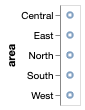

In [29]:
alt.Chart(sample).mark_point().encode(y="area")

Let us add `sales` to the Position Y channel

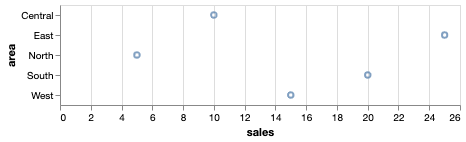

In [30]:
alt.Chart(sample).mark_point().encode(
    y="area",
    x="sales"
)

We can also use the construction methods for encoding, using the syntax `alt.X(var_name)`

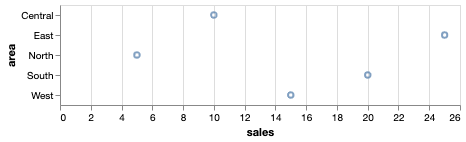

In [31]:
alt.Chart(sample).mark_point().encode(
    alt.Y("area"),
    alt.X("sales")
)

The data type for each field is inferred automatically based on its type within the Pandas data frame. We can also explicitly indicate the data type to Altair by annotating the field name:
 - 'b:N' indicates a nominal type (unordered, categorical data),
 - 'b:O' indicates an ordinal type (rank-ordered data),
 - 'b:Q' indicates a quantitative type (numerical data with meaningful magnitudes), and
 - 'b:T' indicates a temporal type (date/time data)

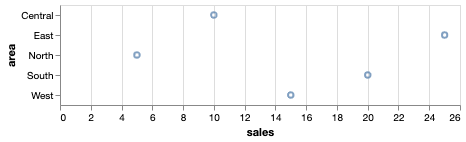

In [32]:
alt.Chart(sample).mark_point().encode(
    alt.Y("area:N"),
    alt.X("sales:Q")
)

## Marks

Marks can be changed example: bar, circle, point, line, ...

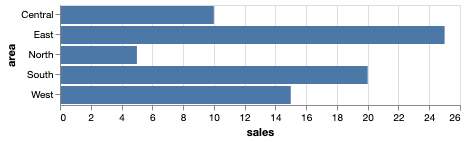

In [33]:
alt.Chart(sample).mark_bar().encode(
    alt.Y("area:N"),
    alt.X("sales:Q")
)

## Annotations

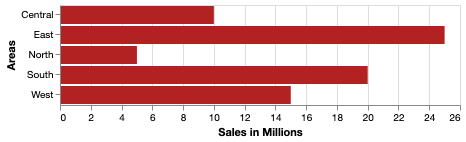

In [35]:
alt.Chart(sample).mark_bar(color='firebrick').encode(
  alt.X('sales', axis=alt.Axis(title='Sales in Millions')),
  alt.Y('area', axis=alt.Axis(title='Areas')),
)

## Compositions

We can combine multiple views together to compose complex visualsiation using 
- Facets
- Concat Horizontal
- Concat Vertical
- Layering

**Horizontal Concatentation**

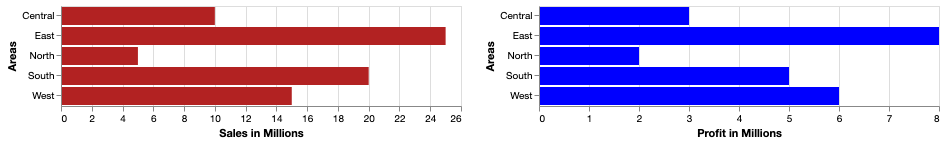

In [56]:
sales_vis = alt.Chart(sample).mark_bar(color='firebrick').encode(
  alt.X('sales', axis=alt.Axis(title='Sales in Millions')),
  alt.Y('area', axis=alt.Axis(title='Areas')),
)

profit_vis = alt.Chart(sample).mark_bar(color='blue').encode(
  alt.X('profit', axis=alt.Axis(title='Profit in Millions')),
  alt.Y('area', axis=alt.Axis(title='Areas')),
)

sales_vis | profit_vis


**Layering**

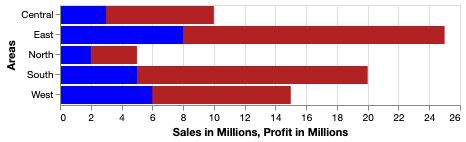

In [69]:
sales_vis = alt.Chart(sample).mark_bar(color='firebrick').encode(
  alt.X('sales', axis=alt.Axis(title='Sales in Millions')),
  alt.Y('area', axis=alt.Axis(title='Areas')),
)

profit_vis = alt.Chart(sample).mark_bar(color='blue').encode(
  alt.X('profit', axis=alt.Axis(title='Profit in Millions')),
  alt.Y('area', axis=alt.Axis(title='Areas')),
)

sales_vis + profit_vis

### Interactivity

To create a simple interactive plot that supports panning and zooming, we can invoke the interactive() method of the Chart object. In the chart below, click and drag to pan or use the scroll wheel to zoom:

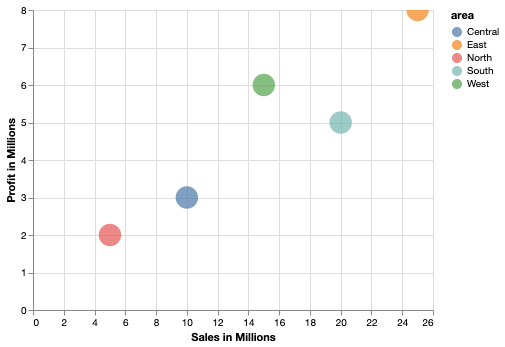

In [70]:
alt.Chart(sample).mark_circle(color='firebrick').encode(
  alt.X('sales', axis=alt.Axis(title='Sales in Millions')),
  alt.Y('profit', axis=alt.Axis(title='Profit in Millions')),
  alt.Size(value=500),
  color="area"
).interactive()

## Vega-lite & Altair

In [73]:
chart = alt.Chart(sample).mark_bar().encode(
    x='sales',
    y='area',
)
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.4.0.json",
  "config": {
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-e9a1bf97bac3c6f8642dc2ef7d8e4b49"
  },
  "datasets": {
    "data-e9a1bf97bac3c6f8642dc2ef7d8e4b49": [
      {
        "area": "North",
        "profit": 2,
        "sales": 5
      },
      {
        "area": "East",
        "profit": 8,
        "sales": 25
      },
      {
        "area": "West",
        "profit": 6,
        "sales": 15
      },
      {
        "area": "South",
        "profit": 5,
        "sales": 20
      },
      {
        "area": "Central",
        "profit": 3,
        "sales": 10
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "sales",
      "type": "quantitative"
    },
    "y": {
      "field": "area",
      "type": "nominal"
    }
  },
  "mark": "bar"
}


In [74]:
x = alt.X('Sales:Q')
print(x.to_json())

{
  "field": "Sales",
  "type": "quantitative"
}


## Publishing to HTML

In [75]:
chart = alt.Chart(sample).mark_bar().encode(
    x='sales',
    y='area',
)
chart.save('chart.html')